# Exploratory Data Analysis with Python

### Source: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?resource=download

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sleep = pd.read_csv('Sleep_Dataset.csv')
sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Part A: Data Scrubbing

## Step A.1: Look at Each Column's Datatypes

In [3]:
sleep.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [4]:
sleep.select_dtypes(include='number')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,1,27,6.1,6,42,6,77,4200
1,2,28,6.2,6,60,8,75,10000
2,3,28,6.2,6,60,8,75,10000
3,4,28,5.9,4,30,8,85,3000
4,5,28,5.9,4,30,8,85,3000
...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,75,3,68,7000
370,371,59,8.0,9,75,3,68,7000
371,372,59,8.1,9,75,3,68,7000
372,373,59,8.1,9,75,3,68,7000


In [5]:
sleep.select_dtypes(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,Male,Software Engineer,Overweight,126/83,None
1,Male,Doctor,Normal,125/80,None
2,Male,Doctor,Normal,125/80,None
3,Male,Sales Representative,Obese,140/90,Sleep Apnea
4,Male,Sales Representative,Obese,140/90,Sleep Apnea
...,...,...,...,...,...
369,Female,Nurse,Overweight,140/95,Sleep Apnea
370,Female,Nurse,Overweight,140/95,Sleep Apnea
371,Female,Nurse,Overweight,140/95,Sleep Apnea
372,Female,Nurse,Overweight,140/95,Sleep Apnea


### Column with Only Numerical Values is either a float or integer datatype. Column with Only Alphabetical Values are defined as object datatype. No column exists as a mix of both, except 'Blood Pressure' column is a fractional value given as String/Object Datatype.

## Step A.2: Split 'Blood Pressure' Column and Change to Integer Types

In [6]:
sleep[['Systolic Blood Pressure','Diastolic Blood Pressure']] = sleep['Blood Pressure'].str.split('/',expand=True)
del sleep['Blood Pressure']
sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [7]:
sleep[['Systolic Blood Pressure','Diastolic Blood Pressure']] = sleep[['Systolic Blood Pressure','Diastolic Blood Pressure']].astype(int)
sleep.dtypes

Person ID                     int64
Gender                       object
Age                           int64
Occupation                   object
Sleep Duration              float64
Quality of Sleep              int64
Physical Activity Level       int64
Stress Level                  int64
BMI Category                 object
Heart Rate                    int64
Daily Steps                   int64
Sleep Disorder               object
Systolic Blood Pressure       int64
Diastolic Blood Pressure      int64
dtype: object

### Now, all the 'object' columns are alphabetical values. All numerical values are either integer and float values. Let's look for null values.

## Step A.3: Monitor Null Values

In [8]:
sleep.isnull().sum()

Person ID                   0
Gender                      0
Age                         0
Occupation                  0
Sleep Duration              0
Quality of Sleep            0
Physical Activity Level     0
Stress Level                0
BMI Category                0
Heart Rate                  0
Daily Steps                 0
Sleep Disorder              0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
dtype: int64

In [9]:
sleep.nunique()

Person ID                   374
Gender                        2
Age                          31
Occupation                   11
Sleep Duration               27
Quality of Sleep              6
Physical Activity Level      16
Stress Level                  6
BMI Category                  4
Heart Rate                   19
Daily Steps                  20
Sleep Disorder                3
Systolic Blood Pressure      18
Diastolic Blood Pressure     17
dtype: int64

### No Null Values Exist. Thus, the Dataset can be assumed to be properly cleaned. Even more, the dataset is ready for EDA (Exploratory Data Analysis)

# Part B: Exploratory Data Analysis

## Step B.1: Show Information of Each Column

In [10]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Person ID                 374 non-null    int64  
 1   Gender                    374 non-null    object 
 2   Age                       374 non-null    int64  
 3   Occupation                374 non-null    object 
 4   Sleep Duration            374 non-null    float64
 5   Quality of Sleep          374 non-null    int64  
 6   Physical Activity Level   374 non-null    int64  
 7   Stress Level              374 non-null    int64  
 8   BMI Category              374 non-null    object 
 9   Heart Rate                374 non-null    int64  
 10  Daily Steps               374 non-null    int64  
 11  Sleep Disorder            374 non-null    object 
 12  Systolic Blood Pressure   374 non-null    int64  
 13  Diastolic Blood Pressure  374 non-null    int64  
dtypes: float64

In [11]:
sleep.drop(columns = 'Person ID', inplace = True)
sleep

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


### The 'Person ID' column is deleted, because the information behind the column has no similarity between the samples. Each row is their own identity.

## Step B.2: Create a Pie Chart for Gender Distribution

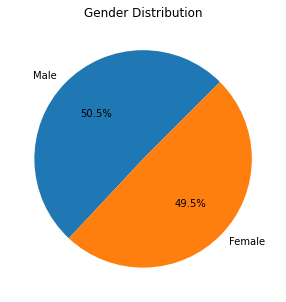

In [12]:
fig,ax = plt.subplots(figsize=(5,5))

Y = sleep['Gender'].value_counts().values
label = sleep['Gender'].value_counts().index

ax.pie(Y, labels=label, autopct='%1.1f%%', startangle = 45)

plt.title('Gender Distribution')

plt.show()

### There is a close amount of Male and Female with only a difference by 0.5%

## Step B.3: Let's Look at Occupation by Gender

In [13]:
gender_by_occupation = sleep.groupby(['Occupation', 'Gender']).size().reset_index(name='Count')

gender_by_occupation = gender_by_occupation.sort_values(by='Count', ascending=False)
gender_by_occupation

,Occupation,Gender,Count
9,Nurse,Female,73
3,Doctor,Male,69
7,Lawyer,Male,45
0,Accountant,Female,36
14,Teacher,Female,35
4,Engineer,Female,32
11,Salesperson,Male,32
5,Engineer,Male,31
15,Teacher,Male,5
12,Scientist,Female,4


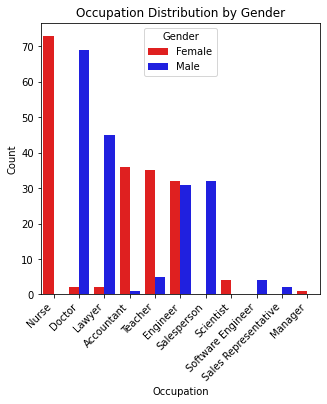

In [14]:
fig,ax = plt.subplots(figsize=(5,5))

gender_colors = {'Male': 'blue', 'Female': 'red'}
sns.barplot(y='Count', x='Occupation', hue='Gender', data=gender_by_occupation, palette=gender_colors)

plt.title('Occupation Distribution by Gender')
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.show()

### There is a large discrepancy for gender distribution in each occupation except Engineer. Both genders who are Engineer has almost an equal amount.

## Step B.4: Let's Look at BMI by Gender

In [15]:
gender_by_bmi = sleep.groupby(['BMI Category', 'Gender']).size().reset_index(name='Count')

gender_by_bmi = gender_by_bmi.sort_values(by='Count', ascending=False)
gender_by_bmi

,BMI Category,Gender,Count
1,Normal,Male,131
6,Overweight,Female,106
0,Normal,Female,64
7,Overweight,Male,42
2,Normal Weight,Female,14
5,Obese,Male,9
3,Normal Weight,Male,7
4,Obese,Female,1


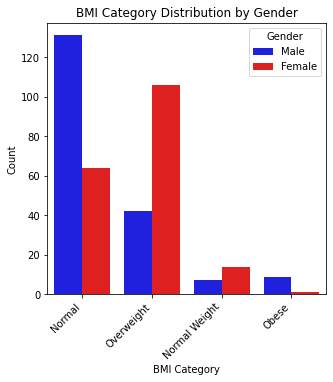

In [16]:
fig,ax = plt.subplots(figsize=(5,5))

sns.barplot(y='Count', x='BMI Category', hue='Gender', data=gender_by_bmi, palette=gender_colors)

plt.title('BMI Category Distribution by Gender')
plt.xlabel('BMI Category')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.show()

### Something feels off. What is the difference between Normal and Normal Weight? What is the difference between Overweight and Obese?

## Step B.5: Let's Look at Sleep Duration by Gender

In [17]:
sleep_duration_by_gender = sleep.groupby(['Sleep Duration', 'Gender']).size().reset_index(name='Count')

sleep_duration_by_gender = sleep_duration_by_gender.sort_values(by='Count', ascending=False)
sleep_duration_by_gender

,Sleep Duration,Gender,Count
33,7.8,Male,28
32,7.7,Male,24
24,7.2,Female,22
4,6.0,Male,18
14,6.6,Female,18
5,6.1,Female,15
13,6.5,Male,14
26,7.3,Male,14
25,7.2,Male,14
41,8.4,Female,14


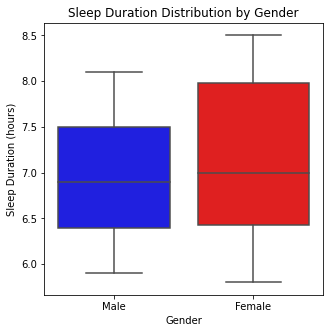

In [18]:
fig,ax = plt.subplots(figsize=(5,5))

sns.boxplot(y='Sleep Duration', x='Gender', data=sleep_duration_by_gender,palette=gender_colors,)

plt.title('Sleep Duration Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration (hours)')

plt.show()

### Now, Female seems to have a larger distribution. The longest a female has slept is 8.5 hrs, but the male slept 8 hrs as the longest.

## Step B.6: Let's Look at Sleep Quality by Gender

In [19]:
sleep_quality_by_gender = sleep.groupby(['Quality of Sleep', 'Gender']).size().reset_index(name='Count')

sleep_quality_by_gender = sleep_quality_by_gender.sort_values(by='Count', ascending=False)
sleep_quality_by_gender

,Quality of Sleep,Gender,Count
9,8,Male,73
10,9,Female,69
5,6,Male,68
7,7,Male,40
4,6,Female,37
6,7,Female,37
8,8,Female,36
2,5,Female,4
1,4,Male,3
3,5,Male,3


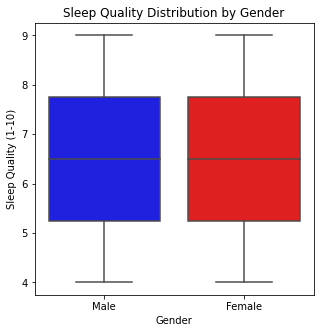

In [20]:
fig,ax = plt.subplots(figsize=(5,5))

sns.boxplot(y='Quality of Sleep', x='Gender', data=sleep_quality_by_gender,palette=gender_colors,)

plt.title('Sleep Quality Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality (1-10)')

plt.show()

### For both genders, the majoriy seems to vote their quality of sleep between 5 and 8.

## Step B.7: Let's Look at Occupation Distribution

In [21]:
occupation_counts = sleep['Occupation'].value_counts().sort_values(ascending=False)
occupation_counts

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

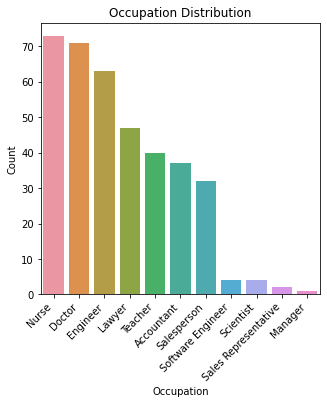

In [22]:
fig,ax = plt.subplots(figsize=(5,5))

sns.barplot(x=occupation_counts.index, y=occupation_counts.values)

plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.show()

### The majority of the dataset are in the medical field.

## Step B.8: Let's Look at Sleep Duration by Occupation

In [23]:
sleep_duration_by_occupation = sleep.groupby(['Sleep Duration', 'Occupation']).size().reset_index(name='Count')

sleep_duration_by_occupation = sleep_duration_by_occupation.sort_values(by='Count', ascending=False)
sleep_duration_by_occupation

,Sleep Duration,Occupation,Count
33,7.2,Accountant,19
4,6.0,Doctor,18
22,6.6,Teacher,16
7,6.1,Nurse,15
63,8.4,Engineer,14
...,...,...,...
13,6.3,Teacher,1
8,6.1,Software Engineer,1
3,5.9,Software Engineer,1
45,7.6,Engineer,1


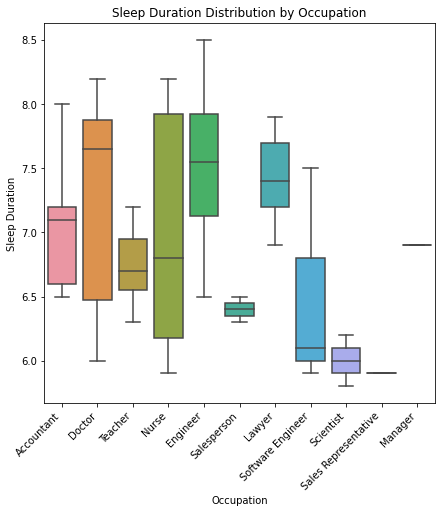

In [24]:
fig,ax = plt.subplots(figsize=(7,7))

sns.boxplot(y='Sleep Duration', x='Occupation',data=sleep_duration_by_occupation)

plt.title('Sleep Duration Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')

plt.xticks(rotation=45, ha='right')

plt.show()

### Among the medical field, looking at the median, doctors have the most sleep and nurses have significantly less sleep.

## Step B.9: Let's Look at Sleep Quality by Occupation

In [25]:
sleep_quality_by_occupation = sleep.groupby(['Quality of Sleep', 'Occupation']).size().reset_index(name='Count')

sleep_quality_by_occupation = sleep_quality_by_occupation.sort_values(by='Count', ascending=False)
sleep_quality_by_occupation

,Quality of Sleep,Occupation,Count
22,8,Lawyer,42
14,7,Doctor,34
29,9,Nurse,33
6,6,Doctor,33
8,6,Nurse,33
9,6,Salesperson,32
28,9,Engineer,32
19,7,Teacher,29
20,8,Accountant,29
21,8,Engineer,28


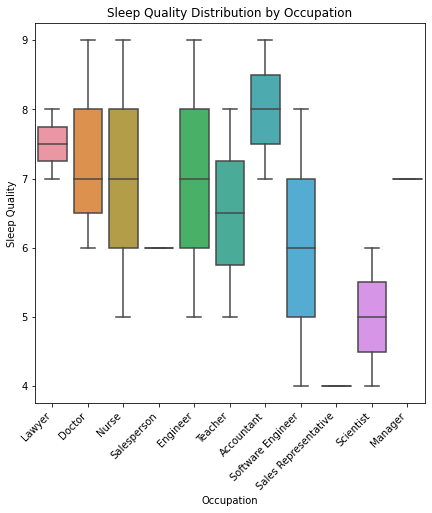

In [26]:
fig,ax = plt.subplots(figsize=(7,7))

sns.boxplot(y='Quality of Sleep', x='Occupation',data=sleep_quality_by_occupation)

plt.title('Sleep Quality Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Quality')

plt.xticks(rotation=45, ha='right')

plt.show()

### Most of the Sleep Quality is between 5 and 8.

## Step B.10: Let's Look at Age Distribution

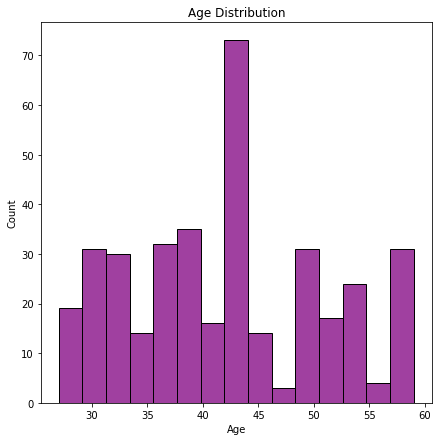

In [27]:
fig,ax = plt.subplots(figsize=(7,7))

sns.histplot(data=sleep['Age'], bins=15,color='purple')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

### The age range is between 20s and 50s.

## Step B.11: Let's Look at the Correlation between the Columns

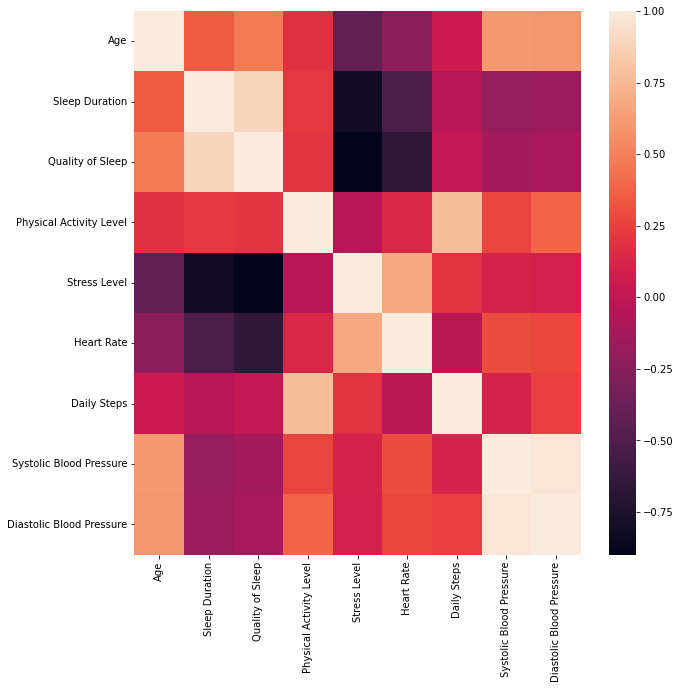

In [28]:
fig,ax = plt.subplots(figsize=(10,10))

sns.heatmap(sleep.corr());

### There is rarely any correlation between the columns except Systolic and Diastolic, which is related to being considered together as blood pressure

## Step B.12: Let's Look at the Box Plot between Physical Activity Level and Sleep Disorder

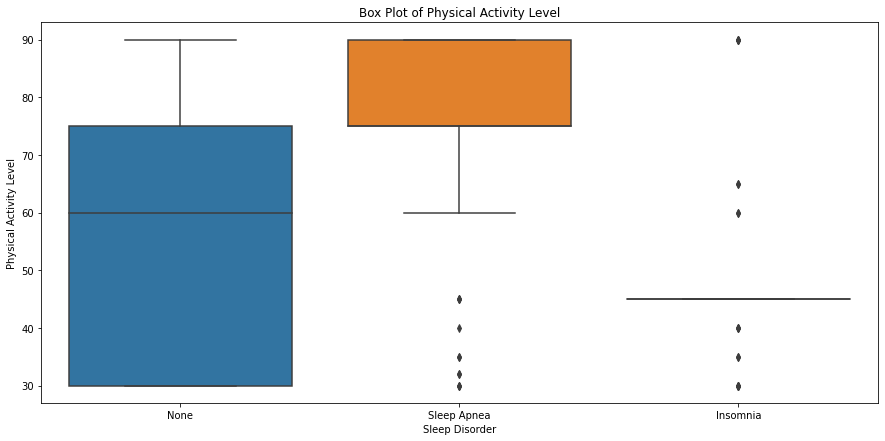

In [29]:
fig,ax = plt.subplots(figsize=(15,7))

sns.boxplot(y='Physical Activity Level', x='Sleep Disorder',data=sleep)

plt.title('Box Plot of Physical Activity Level')
plt.xlabel('Sleep Disorder')
plt.ylabel('Physical Activity Level')

plt.show()

### People with Sleep Apnea tends to have the highest Physical Activity Level

## Step B.13: Let's Look at the Box Plot between BMI Category and Sleep Disorder

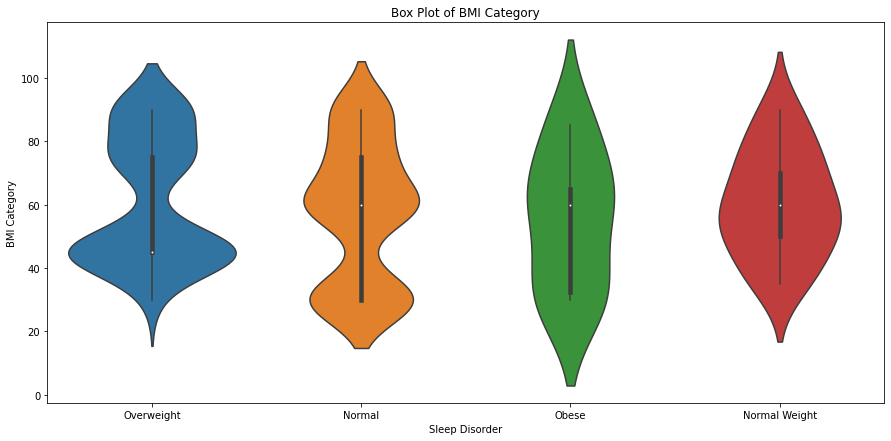

In [30]:
fig,ax = plt.subplots(figsize=(15,7))

sns.violinplot(data = sleep, x='BMI Category', y='Physical Activity Level')

plt.title('Box Plot of BMI Category')
plt.xlabel('Sleep Disorder')
plt.ylabel('BMI Category')

plt.show()

### Interestingly, normal people have no sleep disorder. However, overweight people have either sleep apnea and insomnia.

## Step B.14: Let's Look at the Box Plot between Physical Activity Level and Quality of Sleep

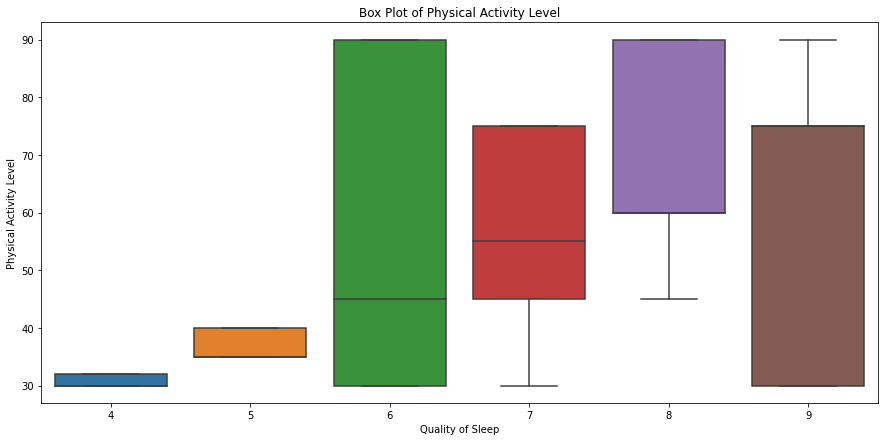

In [31]:
fig,ax = plt.subplots(figsize=(15,7))

sns.boxplot(y='Physical Activity Level', x='Quality of Sleep',data=sleep)

plt.title('Box Plot of Physical Activity Level')
plt.xlabel('Quality of Sleep')
plt.ylabel('Physical Activity Level')

plt.show()

### The less physical activity you engage, the less the quality of sleep you have.

## Step B.15: Let's Look at the Box Plot between Physical Activity Level and Quality of Sleep

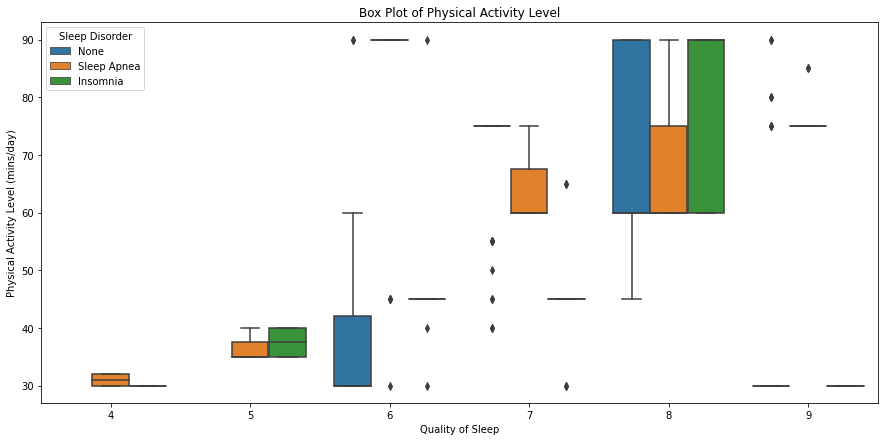

In [32]:
fig,ax = plt.subplots(figsize=(15,7))

sns.boxplot(data = sleep, x='Quality of Sleep', y='Physical Activity Level', hue='Sleep Disorder')

plt.title('Box Plot of Physical Activity Level')
plt.xlabel('Quality of Sleep')
plt.ylabel('Physical Activity Level (mins/day)')

plt.show()

### There is higher physical activity sleep with better sleep.

## Step B.16: Let's Look at the Box Plot between Quality of Sleep and Sleep Level

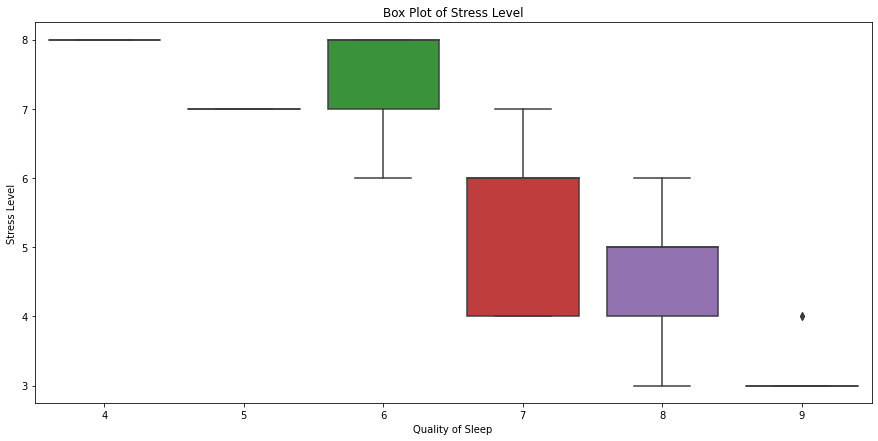

In [33]:
fig,ax = plt.subplots(figsize=(15,7))

sns.boxplot(y='Stress Level', x='Quality of Sleep',data=sleep)

plt.title('Box Plot of Stress Level')
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')

plt.show()

### There is a correlation that less stress comes with better sleep.

## Step B.17: Let's Look at the Box Plot between BMI Category and Quality of Sleep

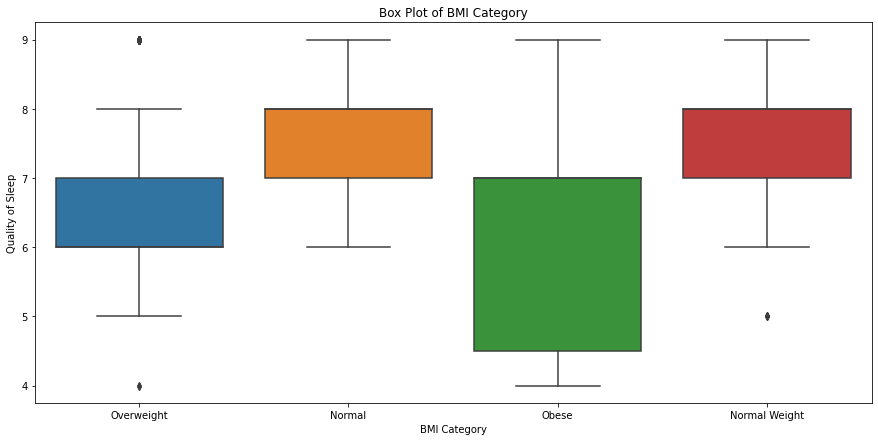

In [34]:
fig,ax = plt.subplots(figsize=(15,7))

sns.boxplot(y='Quality of Sleep', x='BMI Category',data=sleep)

plt.title('Box Plot of BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Quality of Sleep')

plt.show()

### So, people who are worried about their quality of sleep has a lower quality of sleep.

## Step B.18: Let's Look at the Box Plot between Age and Quality of Sleep

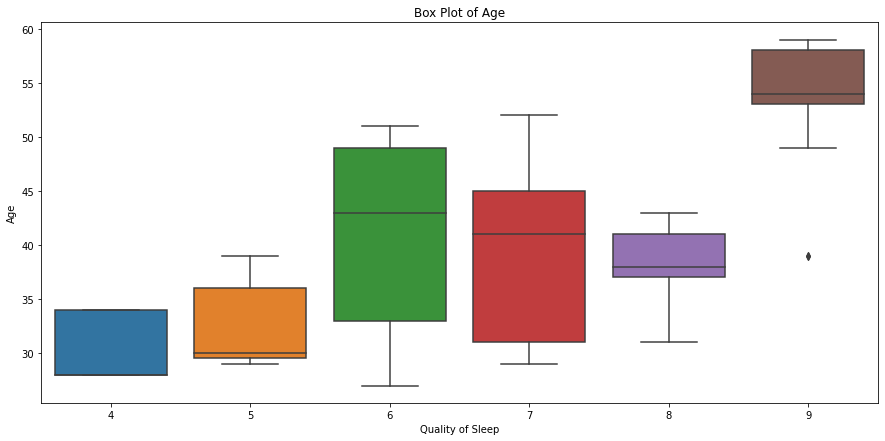

In [35]:
fig,ax = plt.subplots(figsize=(15,7))

sns.boxplot(y='Age', x='Quality of Sleep',data=sleep)

plt.title('Box Plot of Age')
plt.xlabel('Quality of Sleep')
plt.ylabel('Age')

plt.show()

### The older the age, the better the sleep. The cause could originate from the amount of work at a young age.